Loading and saving FE variables
======

Quick demonstration on how to load and save finite element (FE) variables for underworld2.

Load python functions needed for underworld.

In [1]:
%matplotlib inline

import underworld as uw
import math
from underworld import function as fn
import glucifer.pylab as plt
import numpy as np

Set simulation parameters. Number of spatial dimensions and the resolution.

In [2]:
dim = 2
res = 32

Set input and output file directory paths

In [3]:
inputPath = 'LoadSave/'
outputPath = 'LoadSave/'

Create mesh objects

In [4]:
elementMesh = uw.mesh.FeMesh_Cartesian( elementType=("Q1/dQ0"), 
                                         elementRes=(res,res), 
                                           minCoord=(0.,0.), 
                                           maxCoord=(1.,1.)  )

linearMesh   = elementMesh
constantMesh = elementMesh.subMesh 

2


Create Finite Element (FE) variables for the temperature field as an example.

In [5]:
temperatureField = uw.fevariable.FeVariable( feMesh=linearMesh,   nodeDofCount=1 )

Initialise the temperature FE variable with a function based on its spatial coordinates
\\[
T = x z
\\]

In [6]:
for index, coord in enumerate(linearMesh.data):
    temperatureField.data[index] = coord[0]*coord[1]

Plot current temperature field
----

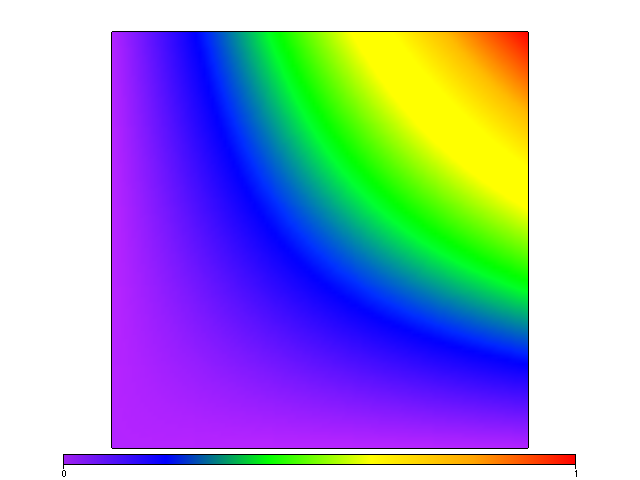

In [7]:
fig = plt.Figure()
fig.Surface(temperatureField, linearMesh)
fig.show()

Save temperature field to file in local directory
----

In [8]:
temperatureField.save(outputPath+'FEVariableSaveExample.out')

Change temperature field data and re-plot
-----

In [9]:
for index, coord in enumerate(linearMesh.data):
    temperatureField.data[index] = float(index)

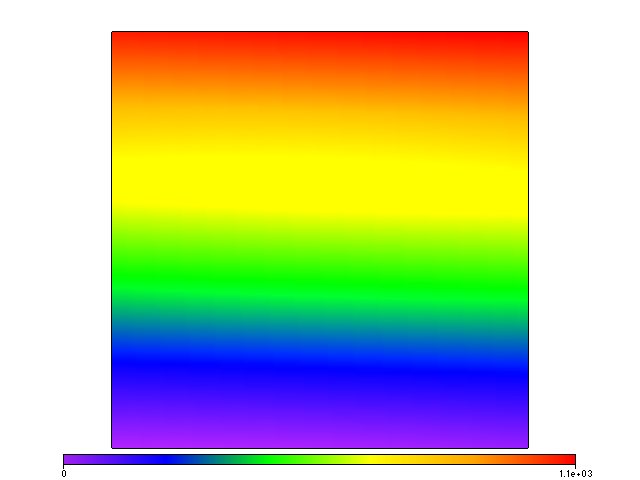

In [10]:
fig = plt.Figure()
fig.Surface(temperatureField, linearMesh)
fig.show()

Reload from file and plot saved temperature field
------

In [11]:
temperatureField.load(inputPath+'FEVariableSaveExample.out')

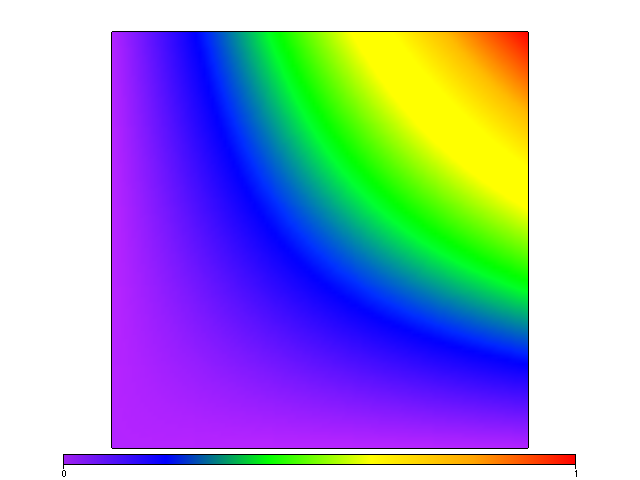

In [12]:
fig = plt.Figure()
fig.Surface(temperatureField, linearMesh)
fig.show()